# Quick Stats Review 
--goal here is just to brush over statistical concepts.. not focusing on data preparation

In [50]:
%config Completer.use_jedi = False ###autocorrection issue with jupterlab – removing package pulls dependencies with it.. quick fix for now

In [51]:
#database
import sqlite3

#structures and linalg
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np

#stats
import statsmodels.api as sm
import scipy

#other
import sys
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

#dont need api stuff
sys.path.insert(1, '/Users/verbeck/Desktop/Finance/Technology/Project/Setup/Resources')
from generalHelpers import getAllTables, getTable

#eliminate unnecessary warnings
import warnings
#warnings.filterwarnings("ignore")

## Table of Contents

[L1](#L1)  
[L2](#L2)  
[L3](#L3)  
[L4](#L4)  
[L5](#L5)  
[L7](#L7)  

In [52]:
#retrieve all tables for use
#all_tables = getAllTables('../../FinancesSp500.db')

## L 1.1 <a id='L1'></a> 

In [53]:
#check out profiles table for 
#profiles_all = all_tables.get('CV_PROFILE')
profiles_all = getTable('../../FinancesSp500.db','CV_PROFILE')

In [54]:
#extract types without making copies
mutual_funds = profiles_all[profiles_all.exchangeShortName=='MUTUAL_FUND']
securities_index = set(profiles_all.index)-set(mutual_funds.index)
stocks = profiles_all.loc[securities_index][profiles_all.loc[securities_index].isEtf==False]
etfs = profiles_all.loc[securities_index][profiles_all.loc[securities_index].isEtf==True]

#tranform to int
stocks.fullTimeEmployees = stocks.fullTimeEmployees.apply(lambda x: int(x) if type(x) == str else np.nan)

In [55]:
#check out a couple categories
print('---Mutual Funds---')
mutual_funds.info(verbose=False)
print('\n---Stocks---')
stocks.info(verbose=False)
print('\n---ETFs---')
etfs.info(verbose=False)

---Mutual Funds---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 539 to 614
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(8), int64(4), object(22)
memory usage: 17.2+ KB

---Stocks---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 1 to 617
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(9), int64(4), object(21)
memory usage: 137.8+ KB

---ETFs---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 619
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(8), int64(4), object(22)
memory usage: 14.5+ KB


In [56]:
#checkout stocks further
display(stocks.describe()) #check out some distributions

,price,beta,volAvg,mktCap,lastDiv,changes,cik,fullTimeEmployees,dcfDiff,dcf,defaultImage,isEtf,isActivelyTrading
count,504.00,504.00,503.00,504.00,504.00,504.00,502.00,503.00,318.00,499.00,504.00,504.00,504.00
mean,171.97,1.09,4916002.83,69681292459.01,1.85,-0.19,776824.26,52197.96,229.40,4533.01,0.01,0.00,1.00
std,318.43,0.55,9746993.60,175460300512.84,2.42,4.74,548388.95,127644.08,1868.91,96312.25,0.12,0.00,0.00
min,0.00,-0.06,22275.00,0.00,0.00,-17.77,1800.00,175.00,-10214.30,-288.71,0.00,0.00,1.00
25%,53.57,0.72,1079136.50,15627183600.00,0.38,-1.55,97009.75,8923.00,-60.68,48.43,0.00,0.00,1.00
50%,100.07,1.06,2104201.00,27071216600.00,1.31,-0.60,877551.00,19000.00,-17.22,98.07,0.00,0.00,1.00
75%,179.61,1.39,4602538.00,56805661750.00,2.54,0.34,1133310.50,52250.00,68.02,177.04,0.00,0.00,1.00
max,4500.84,4.82,107597034.00,2035725110000.00,32.50,55.31,1792044.00,2200000.00,24768.70,2151560.00,1.00,0.00,1.00


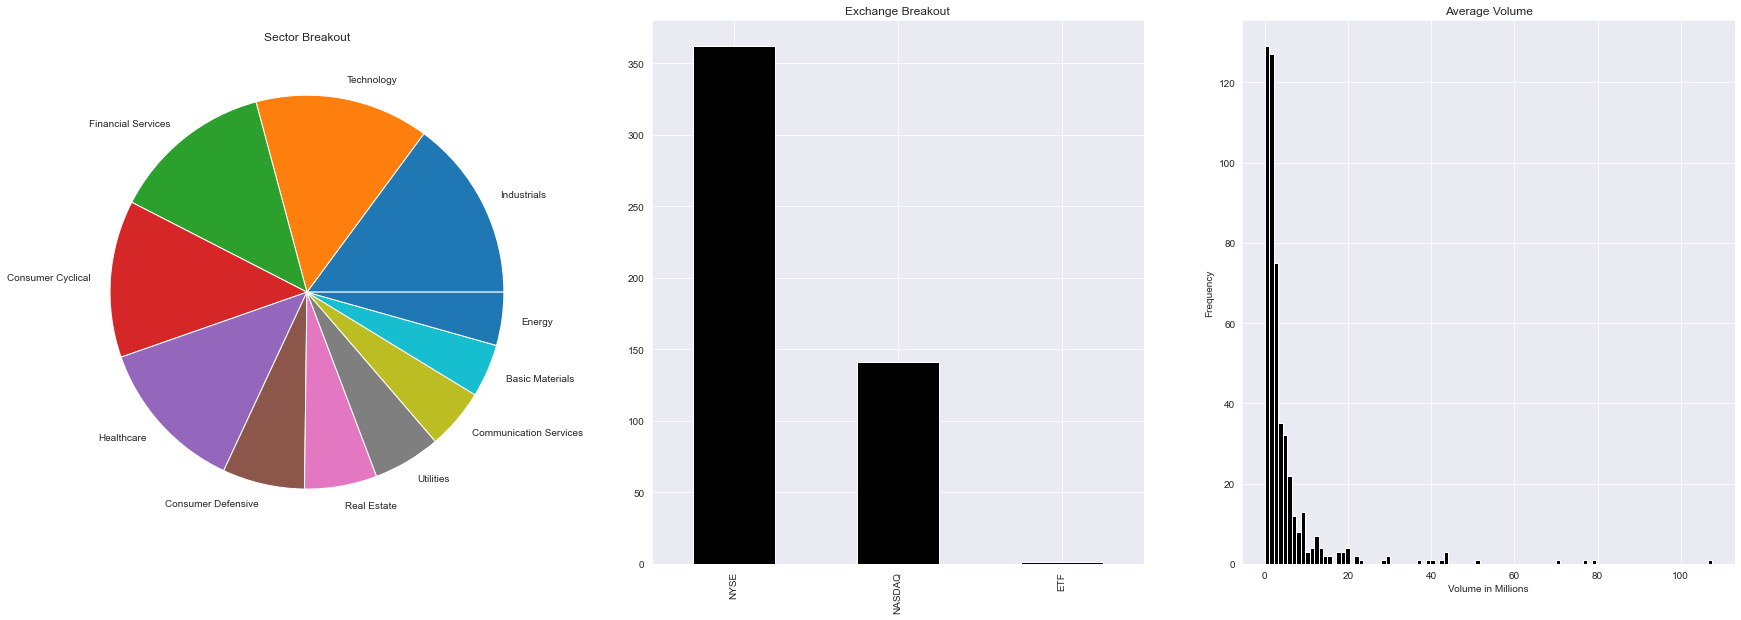

In [57]:
# little bit of eda
fig, axes = plt.subplots(1,3,figsize=(30,10))
ax1 = stocks.sector.value_counts().plot(kind='pie',ax= axes[0])
ax1.set_title('Sector Breakout')
ax1.set_ylabel('')
ax2 = stocks.exchangeShortName.value_counts().plot(kind='bar',ax= axes[1],color='black')
ax2.set_title('Exchange Breakout')
ax3 = (stocks.volAvg/1000000).plot(kind='hist',ax= axes[2],color='black',bins=100)
ax3.set_title('Average Volume')
ax3.set_xlabel('Volume in Millions')
ax3.ticklabel_format(useOffset=False, style='plain')
plt.show()

quick notes- volume positively skewed

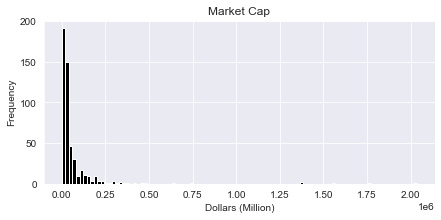

In [58]:
#further look at marketcap
plt.subplots(1,1,figsize=(7,3))
(stocks.mktCap/1000000).plot(kind = 'hist',bins = 100,color='black')
plt.title('Market Cap')
plt.xlabel('Dollars (Million)')
plt.show();

quick notes - marketcap positive skew as as well

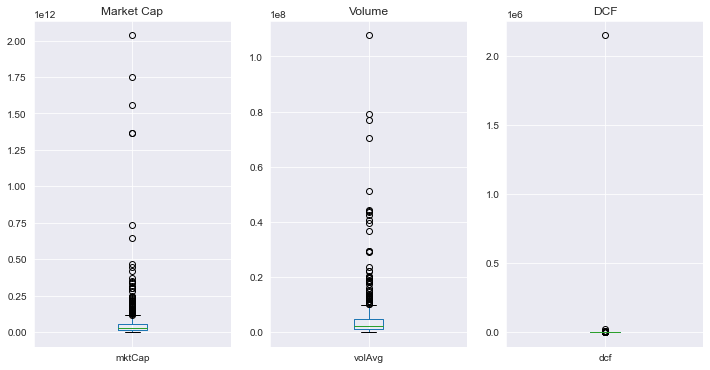

In [59]:
fig, axes = plt.subplots(1,3,figsize=(12,6))
ax1 = stocks.mktCap.plot(kind='box',ax=axes[0])
ax1.set_title('Market Cap')

ax1 = stocks.volAvg.plot(kind='box',ax=axes[1])
ax1.set_title('Volume')

ax1 = stocks.dcf.plot(kind='box',ax=axes[2])
ax1.set_title('DCF')
plt.show();

quick notes - huge outlier for stock DCF. would be interesting to see who that is...

In [60]:
display(stocks.dcf.describe())
print()
display(stocks[stocks.dcf == stocks.dcf.max()])
##Host hotels apparently!

count       499.00
mean       4533.01
std       96312.25
min        -288.71
25%          48.43
50%          98.07
75%         177.04
max     2151560.00
Name: dcf, dtype: float64

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,cik,isin,cusip,exchange,exchangeShortName,industry,website,description,ceo,sector,country,fullTimeEmployees,phone,address,city,state,zip,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading
299,HST,16.59,1.22,8173086.00,11702586400,0.20,7.86-17.43,0.23,Host Hotels & Resorts Inc,USD,1070750.00,US44107P1049,44107P104,New York Stock Exchange,NYSE,REIT Hotel & Motel,http://www.hosthotels.com,"Host Hotels & Resorts, Inc. is an S&P 500 comp...",Mr. James Risoleo,Real Estate,US,175.00,12407441000,"4747 BETHESDA AVENUE, SUITE 1300",Bethesda,MARYLAND,20817,7.69,2151560.00,https://financialmodelingprep.com/image-stock/...,1998-12-29,0,0,1


quick notes - column median indicates there is something wrong with this value.

## L 1.2

In [61]:
#create usable range columns, look @ range
lower = stocks.range.apply(lambda x: np.nan if x == 'null-null' else float(x.split('-')[0]))
upper = stocks.range.apply(lambda x: np.nan if x == 'null-null' else float(x.split('-')[1]))

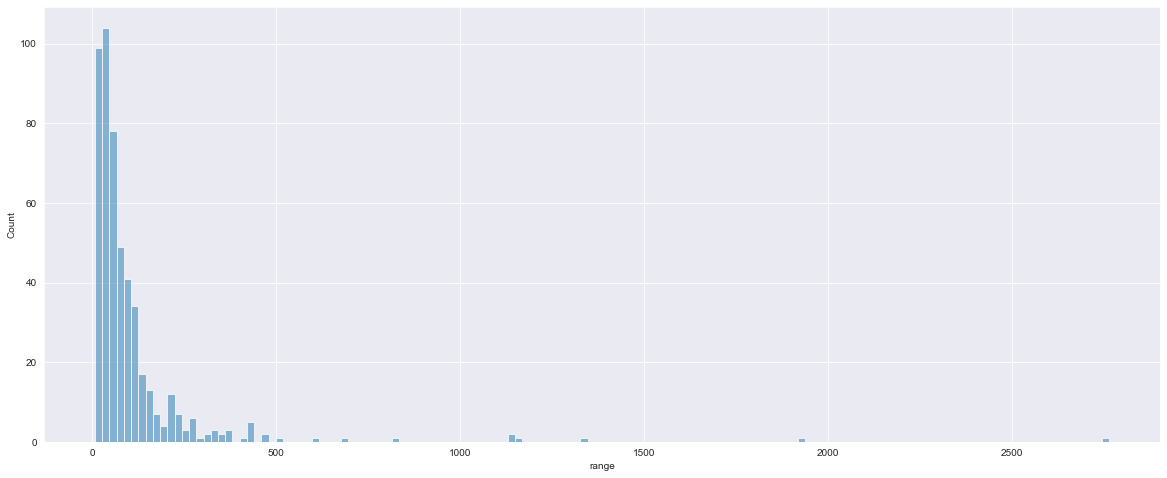

In [62]:
fig, axes = plt.subplots(1,1,figsize=(20,8))
a1 = sns.histplot(upper-lower,ax=axes,palette='Paired',alpha=.5)
plt.title('')
plt.show()

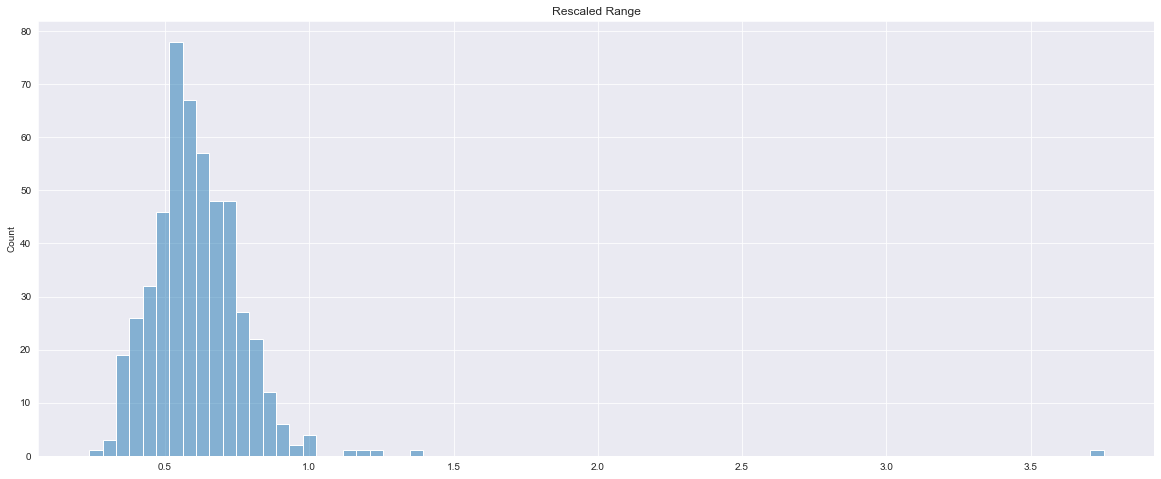

In [63]:
#not in review, but interesting to think about
#rescale to normalize column
fig, axes = plt.subplots(1,1,figsize=(20,8))
scaled = (upper-lower) / stocks.price ##scale by current stock price – shows scaled range for comparison
a1 = sns.histplot(scaled,ax=axes,palette='Paired',alpha=.5)
plt.title('Rescaled Range')
plt.show()

quick notes - notice most companies' range is smalleer than their total stock price, but some are multiples! Good outliers to check


## L 1.3

In [64]:
#quick one sample 2 tail t test against mean of 0
result = scipy.stats.ttest_1samp(lower,0,nan_policy='omit')
result

Ttest_1sampResult(statistic=12.73151732156874, pvalue=2.2511057497041488e-32)

In [65]:
#two sample t test
#equals
result = scipy.stats.ttest_ind(stocks.volAvg,etfs.volAvg,nan_policy='omit')
print(result)

#less than.. 
#result = scipy.stats.ttest_ind(stocks.volAvg,etfs.volAvg,nan_policy='omit',alternative = 'less')
##above throws error due to nans, therefore...
result = scipy.stats.ttest_ind(stocks[stocks.volAvg.notnull()].volAvg,etfs[etfs.volAvg.notnull()].volAvg,alternative='less')
print(result)

Ttest_indResult(statistic=-7.457456896404115, pvalue=3.4238893530203724e-13)
Ttest_indResult(statistic=-7.457456896404115, pvalue=1.7119446765104616e-13)


quick notes – above shows test of sample means, stocks vs etfs.. Shows etfs have higher average vol on av for second test, u1 != u2 for first test

## L 2.1 <a id='L2'></a> 

In [66]:
stocks2 = stocks.drop(index=stocks[stocks.dcf >= 500].index)
stocks2 = stocks2[stocks2.state.isin(['CALIFORNIA','TEXAS'])]

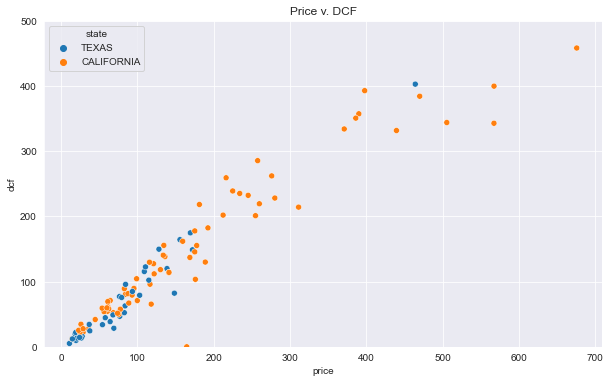

In [67]:
#quick scatter plot, just playing around with looking @ variables against one another
fig, axes = plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(stocks2.price,stocks2.dcf,ax=axes,hue=stocks2.state)
plt.title('Price v. DCF')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim([0,500])
plt.show();

In [68]:
scipy.stats.ttest_ind(stocks2[stocks2.state=='CALIFORNIA'].dcf,stocks2[stocks2.state=='TEXAS'].dcf,alternative='greater')

Ttest_indResult(statistic=3.8549532561913313, pvalue=9.939989114994294e-05)

quick notes - the above shows that companies from california have higher on average dcfs than texas. chart pattern interesting 


## L 2.2

In [69]:
stocks.head()

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,cik,isin,cusip,exchange,exchangeShortName,industry,website,description,ceo,sector,country,fullTimeEmployees,phone,address,city,state,zip,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading
1,CMCSA,52.72,0.91,17309455.00,241492410000,0.92,31.71-53.6,0.48,Comcast Corp,USD,1166691.00,US20030N1019,20030N101,Nasdaq Global Select,NASDAQ,Entertainment,https://corporate.comcast.com/,Comcast Corporation operates as a media and te...,Mr. Brian Roberts,Communication Services,US,190000.00,12152861700,1 Comcast Ctr,Philadelphia,PENNSYLVANIA,19103,89.99,45.71,https://financialmodelingprep.com/image-stock/...,2001-12-07,0,0,1
2,KMI,14.71,0.99,18544206.00,33310060500,1.05,9.42-20.69,-0.58,Kinder Morgan Inc,USD,1506307.00,US49456B1017,49456B101,New York Stock Exchange,NYSE,Oil & Gas Midstream,https://www.kindermorgan.com/,"Kinder Morgan, Inc. operates as an energy infr...",Mr. Steven Kean,Energy,US,11086.00,17133699000,1001 Louisiana St Ste 1000,Houston,TEXAS,77002,-3.50,12.61,https://financialmodelingprep.com/image-stock/...,2011-02-11,0,0,1
3,INTC,60.78,0.68,39416670.00,246949134000,1.34,43.61-65.11,0.38,Intel Corp,USD,50863.00,US4581401001,458140100,Nasdaq Global Select,NASDAQ,Semiconductors,https://www.intel.com/,"Intel Corporation designs, manufactures, and s...",Mr. Robert Swan,Technology,US,111300.00,14087658080,2200 Mission College Blvd,Santa Clara,CALIFORNIA,95054-1549,78.39,54.44,https://financialmodelingprep.com/image-stock/...,1971-10-13,0,0,1
4,MU,91.53,1.31,18021777.00,102391857000,0.00,31.13-93.1,3.41,Micron Technology Inc,USD,723125.00,US5951121038,595112103,Nasdaq Global Select,NASDAQ,Semiconductors,https://www.micron.com/,"Micron Technology, Inc. designs, manufactures,...",Mr. Sanjay Mehrotra,Technology,US,40000.00,12083684000,"8000 S Federal Way, PO Box 6",Boise,IDAHO,None,129.05,59.57,https://financialmodelingprep.com/image-stock/...,1984-06-01,0,0,1
6,GE,12.56,0.91,79007719.00,110125326000,0.05,5.48-13.35,-0.20,General Electric Co,USD,40545.00,US3696041033,369604103,New York Stock Exchange,NYSE,Specialty Industrial Machinery,https://www.ge.com,General Electric Company operates as a high-te...,Mr. H. Lawrence Culp,Industrials,US,189400.00,16174433000,5 NECCO STREET,Boston,MASSACHUSETTS,02210,21.63,11.49,https://financialmodelingprep.com/image-stock/...,1892-06-23,0,0,1


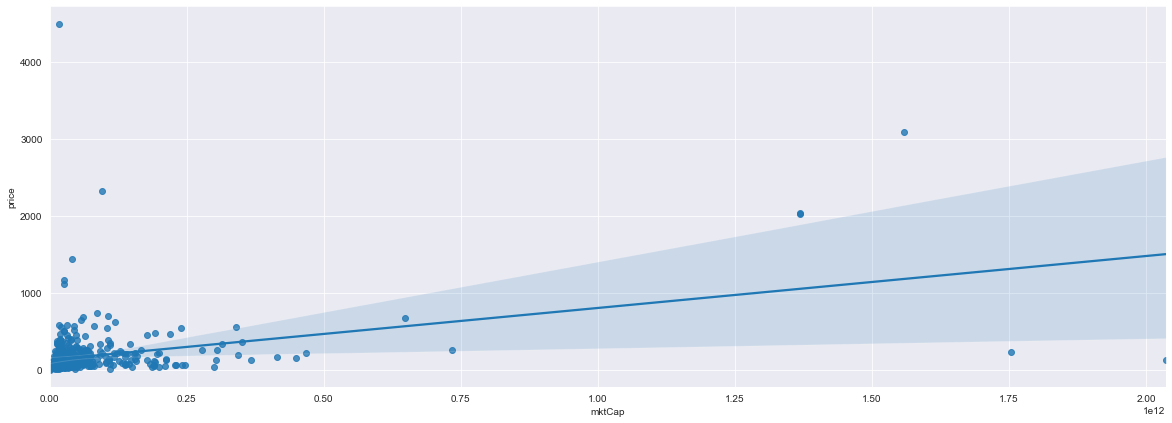

In [70]:
#just take a quick look at example of simple regresion line
fig, axes = plt.subplots(1,1,figsize=(20,7))
ax1 = sns.regplot(stocks['mktCap'],stocks['price'],ax=axes) #x_bins=20) binning regplot creates interesting type of chart for eda
plt.show();

quick notes – obviously these variables may not really be correlated, and both could likely use a logarithmic transformation

## L2.3

In [71]:
#run quick simple reg model w/ other variables to look at output metrics
ols = sm.OLS(stocks.changes,sm.add_constant(stocks.price)) ##add constant.. not sure how I feel about constant inclusion by default as in R or this here
result = ols.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.245    
Dependent Variable: changes          AIC:                2858.0545
Date:               2021-03-16 11:12 BIC:                2866.4996
No. Observations:   504              Log-Likelihood:     -1427.0  
Df Model:           1                F-statistic:        164.6    
Df Residuals:       502              Prob (F-statistic): 8.69e-33 
R-squared:          0.247            Scale:              16.927   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -1.4614     0.2083   -7.0149   0.0000   -1.8707   -1.0521
price       0.0074     0.0006   12.8297   0.0000    0.0063    0.0085
------------------------------------------------------------------
Omnibus:             291.034      Durbin-Watson:         1.984    
Pro

quick note on standard errror- 68% of resid within 0.0005 of prediction, 95 % of resid will be w/in 0.001 of prediction, 99.7% w/in 0.0015 of prediction

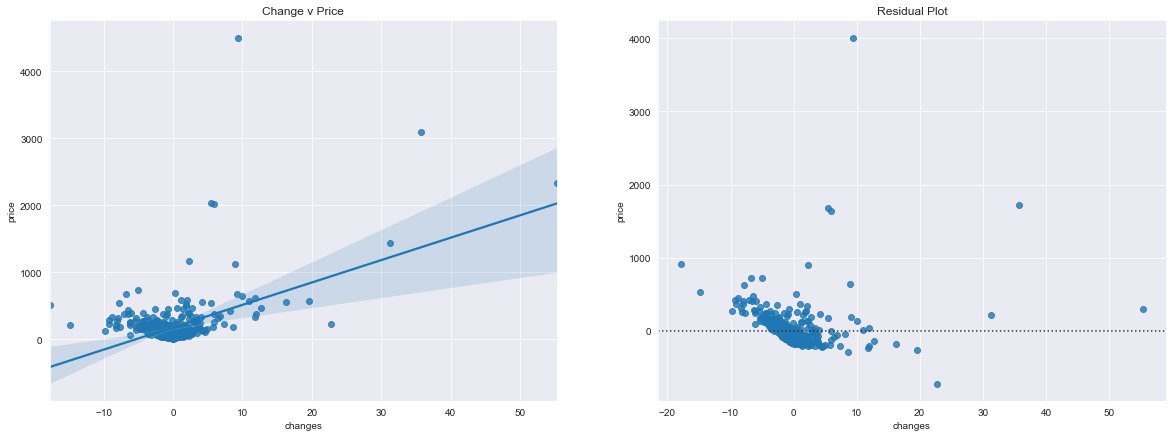

In [72]:
#lets check out a residual plot to test assumptions
fig, axes = plt.subplots(1,2,figsize=(20,7))
ax1 = sns.regplot(stocks.changes,stocks.price,ax=axes[0],ci=95)#x_bins=20) binning regplot creates interesting type of chart for edas
ax1.set_title('Change v Price')
ax2 = sns.residplot(stocks.changes,stocks.price,ax=axes[1])
ax2.set_title('Residual Plot')
plt.show();

quick notes – confidence interval smallest (most confident) when dealing with middle values in data, larger interval on edges  
        --errors larger the further from the mean

Text(0.5, 1.0, 'Error distribution')

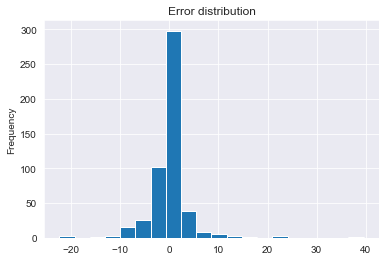

In [73]:
result.resid.plot(kind='hist',bins=20);
plt.title('Error distribution')

In [74]:
#look at residual descriptions
result.resid.describe()

count   504.00
mean      0.00
std       4.11
min     -22.38
25%      -1.13
50%       0.24
75%       1.19
max      39.56
dtype: float64

quick notes – are error assumptions satisfied?   
    --mean errors 0: YES, ols produces mean of 0  
    --errors homoscedastic: NO, residplot shows hetero  
    --errors normal: YES, looks like it  
    --errors independent: YES, no reason to think otherwise. Each is individual security

In [75]:
print('MSE:',result.mse_model)

MSE: 2786.1794139843896


In [76]:
## nice article on simple model evaluation https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [77]:
print('RSquared of {} indicates {} % of variance explained by price for changes'.format(round(result.rsquared,2),round(result.rsquared*100)))

RSquared of 0.25 indicates 25 % of variance explained by price for changes


In [78]:
scipy.stats.pearsonr(stocks.changes,stocks.price)

(0.49691567230623973, 8.68697712013755e-33)

## L3.1 <a id='L3'></a> 

In [79]:
#check out bankruptcy data for mr
brupt = getTable('../../FInancesSp500.db','BANKRUPTCY')

In [80]:
##could be interesting for logistic regression and time series later on
brupt['Business Survival'].value_counts()

Company emerged           799
company did not emerge    370
case pending               22
not classified             11
no data                     6
Name: Business Survival, dtype: int64

quick note – I still need to clean this data. will use something with more continuous variables for initial multiple regression review..

In [81]:
#Example multiple reg model
#def model
targ = 'price'
model = ['volAvg','fullTimeEmployees'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)
TARGET = stocks.loc[DATA.index,targ]

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.040    
Dependent Variable:   price            AIC:                7208.5805
Date:                 2021-03-16 11:12 BIC:                7221.2423
No. Observations:     503              Log-Likelihood:     -3601.3  
Df Model:             2                F-statistic:        11.48    
Df Residuals:         500              Prob (F-statistic): 1.34e-05 
R-squared:            0.044            Scale:              97475.   
--------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
const             172.7948  16.2469 10.6355 0.0000 140.8741 204.7154
volAvg             -0.0000   0.0000 -3.3012 0.0010  -0.0000  -0.0000
fullTimeEmployees   0.0004   0.0001  3.9876 0.0001   0.0002   0.0007
--------------------------------------------------------------------
Omnibus:              745.256      Durbin-Watson:         1.878     
Prob(Omnibus):        0.000        Jarque-Bera (JB):      170905.256
Skew:                 7.994        Prob(JB):              0.000     
Kurtosis:             91.876       Condition No.:         12730709  
====================================================================
* The condition number is large (1e+07). This might indicate
strong multicollinearity or other numerical problems.
"""

quick notes – very low adj r squared (adj accounts for # vars in model) shows vol, employees don't explain alot of variance in price. both statistically sig

In [82]:
#check out rmse
RMSE = np.sqrt(result.mse_resid) # or np.sqrt(result.ssr/result.df_resid)
print('RMSE: {}'.format(RMSE))
print('F TEST p-value: {}n\n'.format(result.f_pvalue))

RMSE: 312.20975674409146
F TEST p-value: 1.3392936066829341e-05n



    
  
    
quick notes – 68% of predictions will be w/in 312 of true value, 95% w/in 624, and 99.7% w/in 936  

    --- f test shows < 0.01% chance that all betas == 0
    
    !!!RMSE is really just the standard deviation of the residuals. Great way to think about it  
    
    --- note difference between confidence interval and prediction interval (mean of all vs. single)

## L3.2

In [83]:
#basic interaction models

#def model
targ = 'price'
model = ['volAvg','fullTimeEmployees'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)
TARGET = stocks.loc[DATA.index,targ]

#define interaction term
DATA['AVG * Employees'] = DATA['volAvg']*DATA['fullTimeEmployees']

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.040    
Dependent Variable:   price            AIC:                7209.3485
Date:                 2021-03-16 11:12 BIC:                7226.2308
No. Observations:     503              Log-Likelihood:     -3600.7  
Df Model:             3                F-statistic:        8.062    
Df Residuals:         499              Prob (F-statistic): 2.97e-05 
R-squared:            0.046            Scale:              97431.   
--------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
const             160.9398  19.4600  8.2703 0.0000 122.7062 199.1734
volAvg             -0.0000   0.0000 -0.6262 0.5315  -0.0000   0.0000
fullTimeEmployees   0.0006   0.0002  3.3270 0.0009   0.0002   0.0010
AVG * Employees    -0.0000   0.0000 -1.1062 0.2692  -0.0000   0.0000
--------------------------------------------------------------------
Omnibus:             744.646     Durbin-Watson:        1.868        
Prob(Omnibus):       0.000       Jarque-Bera (JB):     171536.560   
Skew:                7.978       Prob(JB):             0.000        
Kurtosis:            92.051      Condition No.:        2582157029484
====================================================================
* The condition number is large (3e+12). This might indicate
strong multicollinearity or other numerical problems.
"""

In [84]:
np.sqrt(result.mse_resid)

312.1399337810879

quick notes – interaction term not sig, didn't increase r2 significantly, RMSE same...   
    ---Exclude interaction for this example to avoid obfuscating base terms

## L3.3

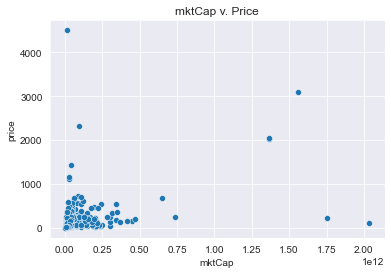

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.016    
Dependent Variable: price            AIC:                7220.7932
Date:               2021-03-16 11:12 BIC:                7233.4550
No. Observations:   503              Log-Likelihood:     -3607.4  
Df Model:           2                F-statistic:        5.204    
Df Residuals:       500              Prob (F-statistic): 0.00579  
R-squared:          0.020            Scale:              99871.   
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
const                0.0000   0.0000  2.7132 0.0069  0.0000 0.0000
mktCap               0.0000   0.0000  9.9338 0.0000  0.0000 0.0000
fullTimeEmployees    0.0003   0.0001  2.7132 0.0069  0.0001 0.0005
mktCap2             -0.0000   0.0000 -0.6656 0.5060 -0.0000 0.0000
------------------------------------------------------------------
Omnibus:         705.378   Durbin-Watson:      1.479              
Prob(Omnibus):   0.000     Jarque-Bera (JB):   211448.604         
Skew:            7.014     Prob(JB):           0.000              
Kurtosis:        102.460   Condition No.:      5963662502878911488
==================================================================
* The condition number is large (6e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

In [85]:
#second order models
sns.scatterplot('mktCap','price',data=stocks)
plt.title('mktCap v. Price')
plt.show()
## pretend as if this would be a strong candidate for second order..
#basic interaction models

#def model
targ = 'price'
model = ['mktCap','fullTimeEmployees'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)
TARGET = stocks.loc[DATA.index,targ]

#define second order term
DATA['mktCap2'] = DATA['mktCap']**2

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

quick notes – second order term not adding anything to model here. This is just a random example, so nothing expected 

In [86]:
#what would complete 2nd order model look like for this guy? let's make it

#def model
targ = 'price'
model = ['mktCap','fullTimeEmployees'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)
TARGET = stocks.loc[DATA.index,targ]

#create complete model#######

#interaction
DATA['mCap * Employees'] = DATA['mktCap'] * DATA['fullTimeEmployees']

#second orders...
DATA['mktCap2'] = DATA['mktCap']**2
DATA['Employees2'] = DATA['fullTimeEmployees']**2
#####

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.062    
Dependent Variable: price            AIC:                7198.8070
Date:               2021-03-16 11:12 BIC:                7219.9099
No. Observations:   503              Log-Likelihood:     -3594.4  
Df Model:           4                F-statistic:        9.330    
Df Residuals:       498              Prob (F-statistic): 2.81e-07 
R-squared:          0.070            Scale:              95223.   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0000   0.0000  3.3607 0.0008  0.0000  0.0000
mktCap              0.0000   0.0000  5.2629 0.0000  0.0000  0.0000
fullTimeEmployees   0.0007   0.0002  3.3607 0.0008  0.0003  0.0011
mCap * Employees    0.0000   0.0000  4.1352 0.0000  0.0000  0.0000
mktCap2            -0.0000   0.0000 -0.6763 0.4991 -0.0000  0.0000
Employees2         -0.0000   0.0000 -4.1270 0.0000 -0.0000 -0.0000
------------------------------------------------------------------
Omnibus:         744.848   Durbin-Watson:      1.503              
Prob(Omnibus):   0.000     Jarque-Bera (JB):   254190.538         
Skew:            7.772     Prob(JB):           0.000              
Kurtosis:        112.027   Condition No.:      6807685453146434560
==================================================================
* The condition number is large (7e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

quick notes – while still very low variance explanation in model, notable that the randomly added interaction term and one second order term turned out to be significant.

In [87]:
#qualitative variable addition.. let's do sector and use energy as reference variable

#def model
targ = 'price'
model = ['sector'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)

###Create dummies and drop###
reference_col = 'Technology'
DATA = pd.get_dummies(DATA).drop(columns=['sector_'+reference_col])

TARGET = stocks.loc[DATA.index,targ]

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                   Adj. R-squared:          0.032    
Dependent Variable:       price                 AIC:                     7234.4132
Date:                     2021-03-16 11:12      BIC:                     7280.8616
No. Observations:         504                   Log-Likelihood:          -3606.2  
Df Model:                 10                    F-statistic:             2.651    
Df Residuals:             493                   Prob (F-statistic):      0.00370  
R-squared:                0.051                 Scale:                   98178.   
----------------------------------------------------------------------------------
                                Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
----------------------------------------------------------------------------------
const                          183.0318  36.9267  4.9566 0.0000  110.4788 255.5848
sector_Basic Materials         -37.9518  76.3295 -0.4972 0.6193 -187.9231 112.0195
sector_Communication Services   85.6486  72.7371  1.1775 0.2396  -57.2643 228.5615
sector_Consumer Cyclical       121.9947  53.6097  2.2756 0.0233   16.6629 227.3264
sector_Consumer Defensive      -81.1136  65.2009 -1.2441 0.2141 -209.2195  46.9923
sector_Energy                 -135.0686  76.3295 -1.7695 0.0774 -285.0399  14.9027
sector_Financial Services      -50.5005  53.1876 -0.9495 0.3428 -155.0027  54.0018
sector_Healthcare               34.3654  53.8294  0.6384 0.5235  -71.3979 140.1287
sector_Industrials             -35.8148  51.6973 -0.6928 0.4888 -137.3891  65.7595
sector_Real Estate             -62.7135  68.0894 -0.9210 0.3575 -196.4947  71.0677
sector_Utilities              -118.9829  69.7848 -1.7050 0.0888 -256.0952  18.1295
----------------------------------------------------------------------------------
Omnibus:                  739.229           Durbin-Watson:              1.905     
Prob(Omnibus):            0.000             Jarque-Bera (JB):           157713.562
Skew:                     7.873             Prob(JB):                   0.000     
Kurtosis:                 88.219            Condition No.:              10        
==================================================================================

"""

quick notes – low r2, significant ftest (@ least 1 beta != 0)  
    ---can say that avg. price for consumer cyclical > that of technology.....can't say whether others are significantly different based on t-tests!

In [88]:
#demonstrate difference in price b/t sectors for example
stocks.groupby('sector')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Basic Materials,22.00,145.08,145.66,19.73,55.53,106.18,164.86,680.68
Communication Services,25.00,268.68,550.75,12.29,31.93,64.49,133.97,2036.86
Consumer Cyclical,65.00,305.03,732.08,10.92,45.11,103.53,161.00,4500.84
Consumer Defensive,34.00,101.92,72.37,23.17,50.02,79.64,128.97,331.00
Energy,22.00,47.96,33.81,11.12,22.05,41.02,65.31,148.57
Financial Services,67.00,132.53,131.51,15.34,48.92,93.95,162.32,695.12
Healthcare,64.00,217.40,192.95,14.85,78.39,166.29,275.57,1118.88
Industrials,75.00,147.22,105.91,0.00,64.34,117.80,202.59,577.73
Real Estate,30.00,120.32,121.89,16.59,45.39,87.42,150.58,648.34


quick notes – sure enough, this backs up the model.  
--we can see diff(avgs) b/t sectors here are consistent b/t model and data.  
very long and impractical equation below further confirms!

In [89]:
round(stocks.groupby('sector')['price'].describe().loc['Consumer Cyclical','mean'] - stocks.groupby('sector')['price'].describe().loc['Technology','mean'],2) == round(result.params['sector_Consumer Cyclical'],2)

True

## L4.1  <a id='L4'></a> 

In [90]:
#use brupt data created in dsc441 review
brupt = pd.read_csv('bankruptcy.csv',index_col=0)
pd.set_option('max_columns',None)

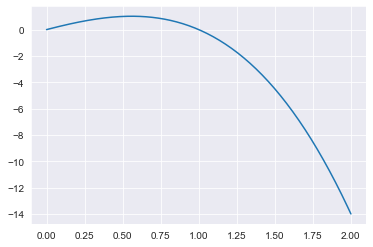

In [91]:
#is relationship 2nd order? if so, what type??
#messing around with graphing
x = np.linspace(0,2,200)
y = (-x**2+3*x-2*x**3)
plt.plot(x,y);

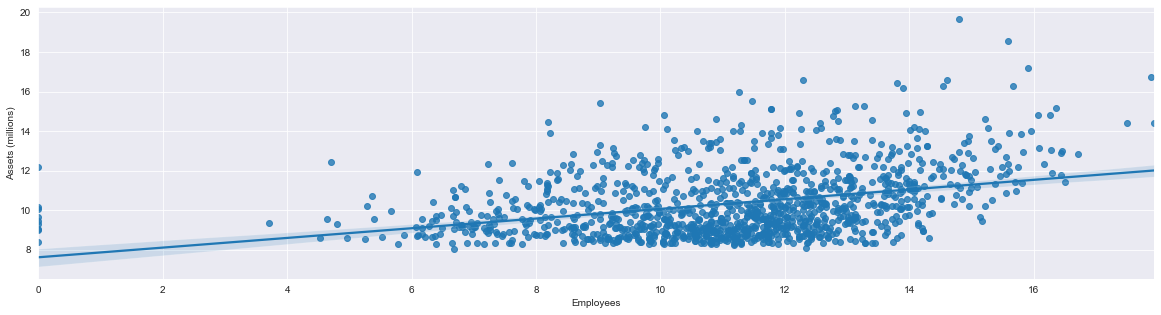

In [92]:
#messing around looking for models w/ 2+ order forms, mainly playing with transformations to try and get something workable w/highly skewed data
warnings.filterwarnings('ignore')
f, axes = plt.subplots(1,1, figsize=(20,5))
sns.regplot(np.log2(brupt.Employees),np.log2(brupt['Assets (millions)']),ax=axes)
plt.show()

## L4.2/4.3

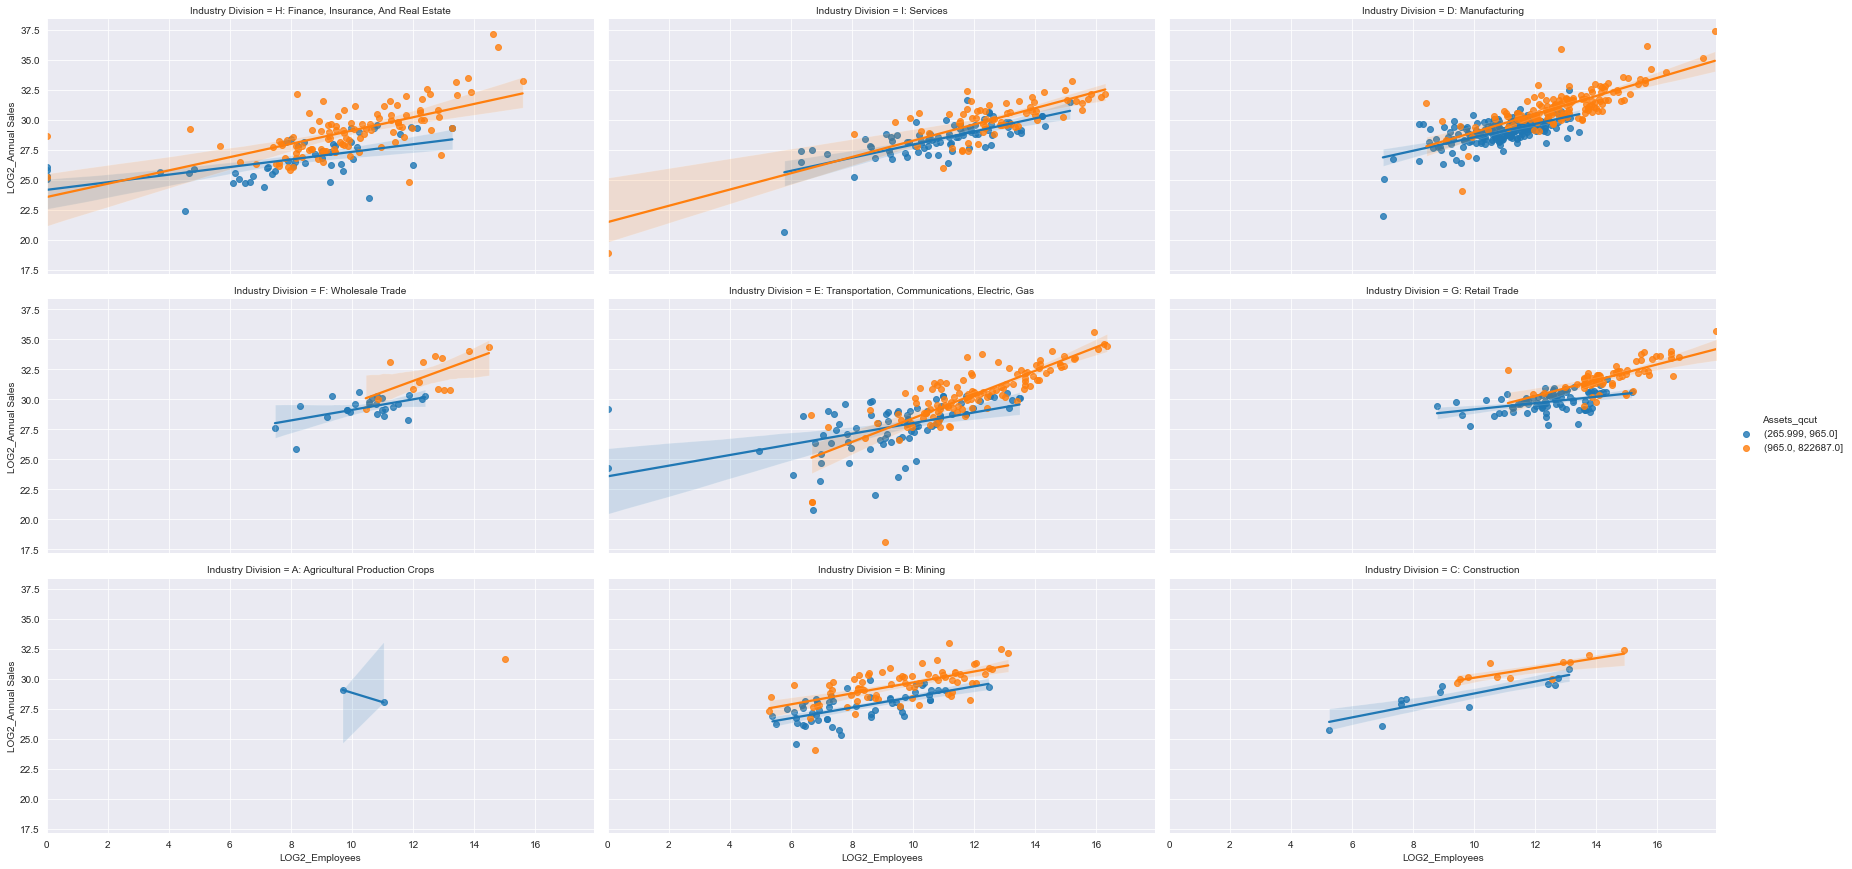

In [93]:
####DEMONSTRATING SEABORN, also contour lines, diff. between qual vars
brupt['LOG2_Assets (millions)'] = np.log2(brupt['Assets (millions)'])
brupt['LOG2_Employees'] = np.log2(brupt['Employees'])
brupt['Assets_qcut'] = pd.qcut(brupt['Assets (millions)'],2)
brupt['LOG2_Annual Sales'] = np.log2(brupt['Annual Sales'])
#two var models, contour lines
sns.lmplot(x='LOG2_Employees',y='LOG2_Annual Sales',hue='Assets_qcut',col='Industry Division',data=brupt,height=4,aspect=2,col_wrap=3)
plt.show()

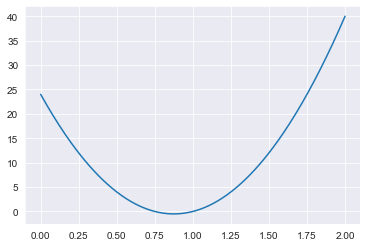

In [94]:
#is relationship 2nd order? if so, what type??
#messing around with graphing on 2d surface.. obviously not delving in to mpl scientific graphing capabilities
x1 = np.linspace(-4,4,200)
x2 = np.linspace(-4,4,200)
y = (x1 + x2 + x1**2 + x2**2)
plt.plot(x,y);

quick notes – when looking @ data, does it make sense to fit 2+ order vars? Does the actual data act in a second order fashion(ie parabolic, wave-like,etc.)  


    ---nice description of interaction term: "EFFECT OF ONE INDEPENDENT VARIABLE ON DEPENDENT VARIABLE DEPENDS ON ANOTHER VARIABLE"
    
    ---often helpful to build any model worth trying, then use ftest, pvalues, r2, etc. to evaluate!

## L5.1  <a id='L5'></a> 

In [95]:
#cross validation – avoid overfitting data
from sklearn.model_selection import train_test_split, KFold

#get cont. columns for example cv
model = list(stocks.describe().columns[:-3])
targ = 'price'
model.remove(targ)

#define x and y
X = stocks[model]
Y = stocks[targ]

#run 10-fold cv
kf = KFold(n_splits=10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print('CV Example for split {}!!!'.format(i))
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]

CV Example for split 0!!!
CV Example for split 1!!!
CV Example for split 2!!!
CV Example for split 3!!!
CV Example for split 4!!!
CV Example for split 5!!!
CV Example for split 6!!!
CV Example for split 7!!!
CV Example for split 8!!!
CV Example for split 9!!!


## L5.2 & 5.3

In [96]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression as OLS

In [97]:
#define initial model-- look at financial serv vs healthcare

#initial model
model = list(stocks.describe().columns[:-3]) #just use cont. vars for simplicity
model += ['sector']

#fin/health model only
fin_health = stocks[stocks.sector.isin(['Financial Services','Healthcare'])].loc[:,model]
fin_health = pd.get_dummies(fin_health,drop_first=True)

#dummies
model.remove('sector')
model += ['sector_Healthcare']

#create data
targ = 'price'
DATA = fin_health[model].dropna()
TARGET = DATA[targ]
DATA.drop(columns=[targ],inplace=True)

In [98]:
###Forward selection
print('––––––––FORWARD SELECTION 50% features–––––––\n')
#define reg model
ols = OLS()

#def forward model, score by r**2, 3fold cv, select half features
sfs = SFS(ols,n_features_to_select=int(np.ceil(len(model)/2)),direction='forward',scoring='r2',cv=3).fit(DATA,TARGET)

#get reduced data
forward_index = sfs.get_support()
DATA_FS = DATA.iloc[:,forward_index]

#run ols with reduce data and show
ols_fs = sm.OLS(TARGET,sm.add_constant(DATA_FS))
fs_result = ols_fs.fit()
display(fs_result.summary2())

#backward elimination
print('\n\n––––––––BACKWARD ELIMINATION 33% features–––––––\n')

#def forward model, score by r**2, 3fold cv, select half features
sfs = SFS(ols,n_features_to_select=int(np.ceil(len(model)/3)),direction='backward',scoring='r2',cv=3).fit(DATA,TARGET)

#get reduced data
backward_index = sfs.get_support()
DATA_BE = DATA.iloc[:,backward_index]

#run ols with reduce data and show
ols_be = sm.OLS(TARGET,sm.add_constant(DATA_BE))
be_result = ols_be.fit()
display(be_result.summary2())

––––––––FORWARD SELECTION 50% features–––––––



<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:               OLS               Adj. R-squared:      0.133    
Dependent Variable:  price             AIC:                 1182.3990
Date:                2021-03-16 11:12  BIC:                 1199.8976
No. Observations:    90                Log-Likelihood:      -584.20  
Df Model:            6                 F-statistic:         3.270    
Df Residuals:        83                Prob (F-statistic):  0.00617  
R-squared:           0.191             Scale:               27593.   
---------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
---------------------------------------------------------------------
const             148.1403  93.5851  1.5829 0.1172  -37.9967 334.2774
beta              -13.3154  53.4521 -0.2491 0.8039 -119.6294  92.9986
lastDiv             8.6219  13.7344  0.6278 0.5319  -18.6953  35.9391
changes            13.7762   6.2268  2.2124 0.0297    1.3913  26.1611
cik                 0.0000   0.0000  0.4047 0.6867   -0.0001   0.0001
fullTimeEmployees  -0.0005   0.0003 -1.7192 0.0893   -0.0010   0.0001
sector_Healthcare 114.5541  43.6605  2.6237 0.0103   27.7150 201.3931
---------------------------------------------------------------------
Omnibus:               44.769        Durbin-Watson:           1.656  
Prob(Omnibus):         0.000         Jarque-Bera (JB):        127.052
Skew:                  1.730         Prob(JB):                0.000  
Kurtosis:              7.681         Condition No.:           5762499
=====================================================================
* The condition number is large (6e+06). This might indicate
strong multicollinearity or other numerical problems.
"""



––––––––BACKWARD ELIMINATION 33% features–––––––



<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.146    
Dependent Variable:  price            AIC:                1179.1880
Date:                2021-03-16 11:12 BIC:                1191.6871
No. Observations:    90               Log-Likelihood:     -584.59  
Df Model:            4                F-statistic:        4.794    
Df Residuals:        85               Prob (F-statistic): 0.00155  
R-squared:           0.184            Scale:              27181.   
-------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|   [0.025  0.975] 
-------------------------------------------------------------------
const             145.7030  38.0292  3.8314 0.0002 70.0909 221.3152
changes            13.1965   6.1141  2.1584 0.0337  1.0399  25.3530
cik                 0.0000   0.0000  0.4889 0.6262 -0.0000   0.0001
fullTimeEmployees  -0.0004   0.0003 -1.6151 0.1100 -0.0009   0.0001
sector_Healthcare 111.2719  35.2322  3.1582 0.0022 41.2209 181.3230
-------------------------------------------------------------------
Omnibus:               42.496       Durbin-Watson:          1.666  
Prob(Omnibus):         0.000        Jarque-Bera (JB):       111.350
Skew:                  1.674        Prob(JB):               0.000  
Kurtosis:              7.299        Condition No.:          2286711
===================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

#### quick notes 

    ---this example doesn't provide any kind of stopping condition or other mechanism for determining the correct of FEATURES, which would realistically be needed.   Doubtful about these methods!
    ---interesting that the model with less features scored higher on F test and rsquared  
    ---sklearn has no "all subset" selection packages, will come back later in R. These days, all subset is viable selection over FS and BE due to advancements in computing power..

## L7.1  <a id='L7'></a> 
####  (L6 was exam)

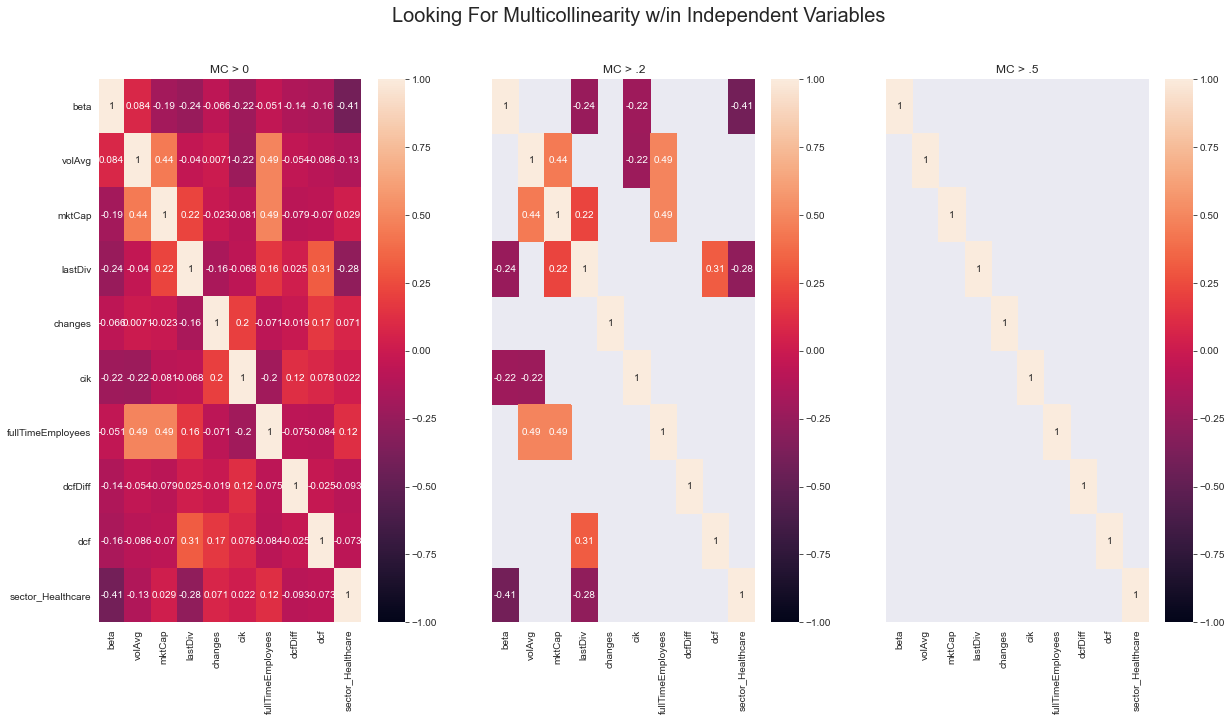

In [194]:
##Multicollinearity.. lets just look @ previous model's data
fig, axes = plt.subplots(1,3,figsize=(20,10),sharey=True)
fig.suptitle('Looking For Multicollinearity w/in Independent Variables',fontsize=20)
ax1 = sns.heatmap(DATA.corr()[np.abs(DATA.corr())>.0],vmin=-1,vmax=1,annot=True,ax=axes[0])
ax1.set_title('MC > 0')
ax2 = sns.heatmap(DATA.corr()[np.abs(DATA.corr())>.2],vmin=-1,vmax=1,annot=True,ax=axes[1])
ax2.set_title('MC > .2')
ax3 = sns.heatmap(DATA.corr()[np.abs(DATA.corr())>.5],vmin=-1,vmax=1,annot=True,ax=axes[2])
ax3.set_title('MC > .5')
handles, labels = ax3.get_legend_handles_labels()
plt.show();

quick notes    

    ---not much multicollinearity in this data. Nothing over .5 as shown above

In [227]:
##thank you https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/ for the python impl of vif

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
VIF_be_model= pd.DataFrame() 
VIF_be_model["feature"] = DATA.columns 
VIF_be_model['VIF'] = [vif(DATA.values, i) for i in range(len(DATA.columns))] 
VIF_be_model

,feature,VIF
0,beta,3.02
1,volAvg,2.19
2,mktCap,2.54
3,lastDiv,2.64
4,changes,1.29
5,cik,2.46
6,fullTimeEmployees,2.53
7,dcfDiff,1.05
8,dcf,1.27
9,sector_Healthcare,1.75


quick notes  

    ---VIF shows same outcome– all VIFs <= ~3 indicates no sig. multicollinearity.
    ---looking at above model above, we see both f and p vals are sig., indicating model not being warped due to mc
    ---if mc, could redefine model, design experiment, or z-score normalize (when 2nd order term causing multicollinearity), as well as PCA, ridge regression, etc. 

## L7.2 - pitfalls of regression

    --- need to make sure enough df for higher order models (or else infinite number of eays to draw line)
    --- look at standardized betas, not regular coefs, to determine feature importance in a model. 
    --- avoid extrapolation w/ regular regression, avoid hidden extrapolation (predictions outside of experimental region defined by model)

## 7.3 - variable transformation

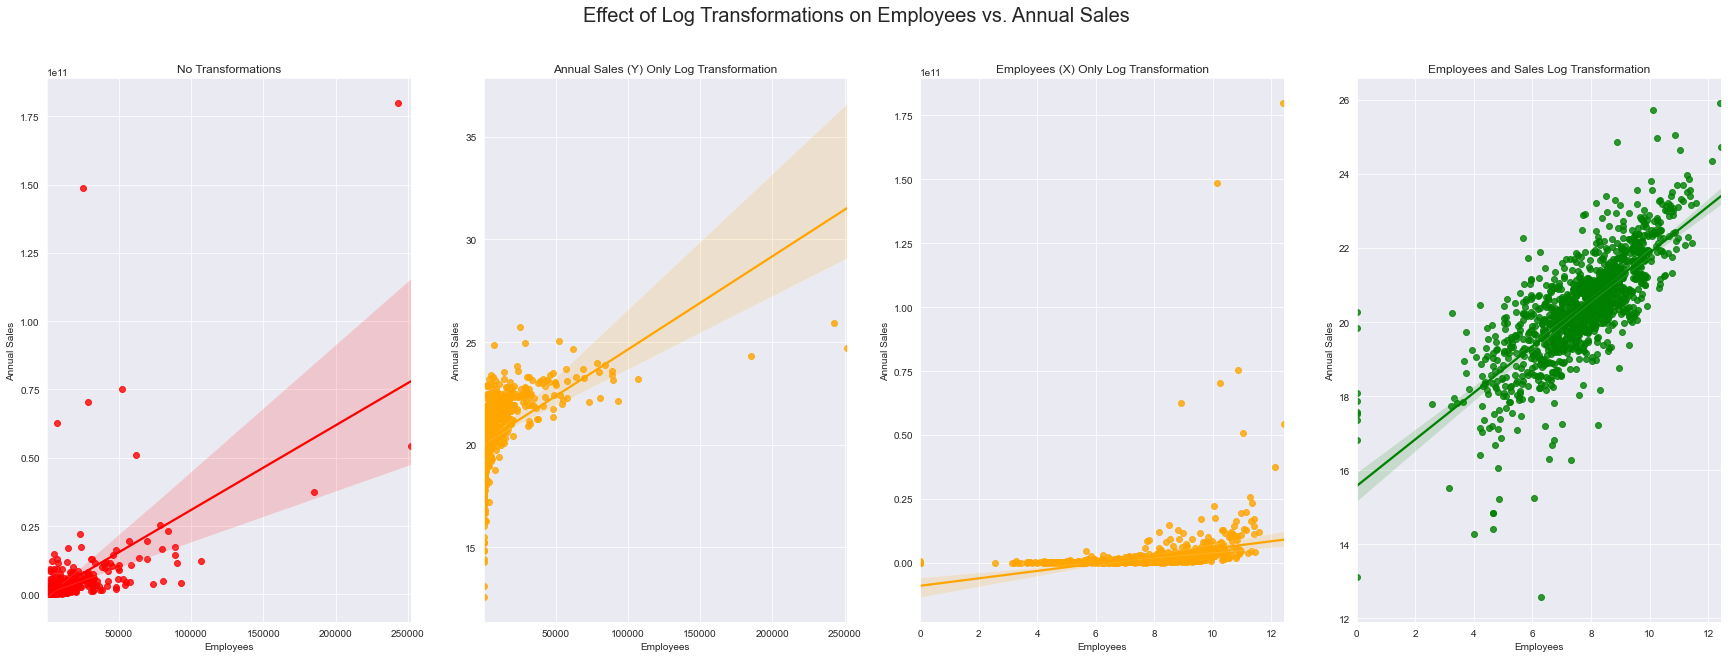

In [267]:
fig, axes = plt.subplots(1,4, figsize=(30,10))
fig.suptitle('Effect of Log Transformations on Employees vs. Annual Sales',fontsize=20)
ax1 = sns.regplot(brupt['Employees'],brupt['Annual Sales'],ax=axes[0],color='red')
ax1.set_title('No Transformations')
ax2 = sns.regplot(brupt['Employees'],np.log(brupt['Annual Sales']),ax=axes[1],color='orange')
ax2.set_title('Annual Sales (Y) Only Log Transformation')
ax3 = sns.regplot(np.log(brupt['Employees']),brupt['Annual Sales'],ax=axes[2],color='orange')
ax3.set_title('Employees (X) Only Log Transformation')
ax4 = sns.regplot(np.log(brupt['Employees']),np.log(brupt['Annual Sales']),ax=axes[3],color='green')
ax4.set_title('Employees and Sales Log Transformation')
plt.show();

quick notes   

    ---this is actually a great example, and one I have been waiting to use.
    ---When building a LINEAR model, you can see that the log transformation of both the endog and exog var will lead to the best results. nearly all numerical vars in this set would benefit from this transformation
    ---this is to be expected for market data, where size difference between any two companies can be extreme
    ---it is notable that the CI on graph #3 seems relatively similar to #4, which shows that the log transformation for Employees is likely more important to a linear model than that for sales. Ideally I would do both